# Homework 2 - Instagram Profiles & Posts

### Libriaries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import functions as fn
import datatable as dt
from datetime import datetime
import scipy.stats as stats

## Research questions

#### [RQ1] After collecting information, the Data Scientists have to know what dataset they are dealing with, so let's start with an Exploratory Data Analysis (EDA). What can you say about our datasets? Please summarise its main characteristics with visual and tabular methods.

#### FIRST DATASET: PROFILES

In [55]:
df_profiles = pd.read_csv('instagram_profiles.csv', sep = "\t")
df_profiles.dtypes
df_profiles = df_profiles.drop(["firstname_lastname", "description", "url", "cts"], axis = 1)

df_profiles is a dataset that collects 10 variables. With informations about instagram profiles. We are going to consider just this variables:
- SID: the sequence ID of the dataset (integer)
- PROFILE_ID: the instagram ID (float)
- PROFILE_NAME: the name of the account (object)
- FOLLOWING: the number of the followed people (float)
- FOLLOWERS: the number of the followers (float)
- N_POSTS: the number of the post (float)
- IS_BUISNESS_ACCOUNT: return True or False if it is a business account or not (object)

In [56]:
df_profiles.describe().applymap('{:,.2f}'.format)

,sid,profile_id,following,followers,n_posts
count,"4,509,586.00","4,477,139.00","3,452,771.00","3,452,771.00","3,452,771.00"
mean,"2,255,991.72","3,083,301,899.75","1,405.64","4,739.90",409.54
std,"1,301,806.65","42,665,750,578.32","8,113.47","193,908.71","1,041.94"
min,"1,186.00",4.00,0.00,0.00,0.00
25%,"1,128,596.25","273,517,749.00",356.00,159.00,22.00
50%,"2,255,992.50","1,649,248,274.00",754.00,406.00,120.00
75%,"3,383,388.75","5,514,690,705.50","1,573.00",974.00,420.00
max,"4,510,785.00","90,010,129,721,363.00","4,191,080.00","285,457,645.00","183,730.00"


In this table it's possibile to discover more information about this dataset.

4.477 milions of profiles are in this dataset. The average of posts per profile is 409 posts, while the average of followers is 4739 per profile and the average of following is 1405 people.
However, the average doesn't say what is the dispersion level of a distribution. It's possibile to understand from the standard deviation that the variable with the bigger variance is "Followers". This means that the profiles are not centered around the average, but there are some profiles with a lot of followers and others with a few.

Let's have a look in the followers boxplot. This graph is a good wat to represent the distrubution and study the variance.

<AxesSubplot:xlabel='followers'>

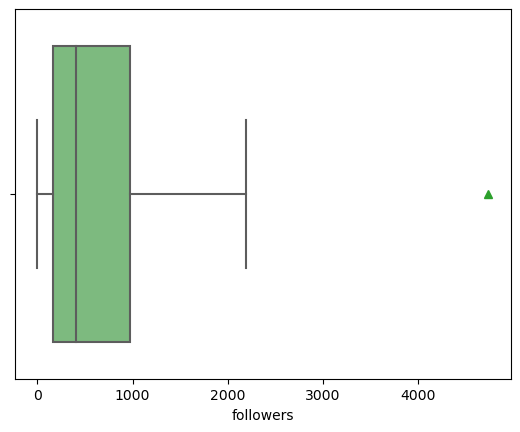

In [57]:
sns.boxplot(x = df_profiles["followers"], showfliers = False, palette="Greens", showmeans = True)

The 50% of the data in the middle of the distribution have a number of followers between 159 and 974. They are collocated inside the box (between the first and the third quantile that splits off the lowest 25% of data and the highest 25%). It's interesting to see how the average (the triangle) is outside the box, and very far from the median. (the line in the box). This tell the big variance that there is in this variable. In fact, there are few profiles that have a huge number of followers and that raise the average.

<AxesSubplot:xlabel='following'>

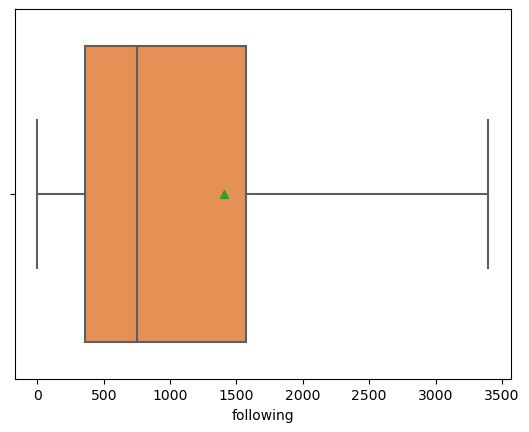

In [58]:
sns.boxplot(x = df_profiles["following"], showfliers = False, palette = "Oranges", showmeans = True)

Studying the correlation between the variables "following", "followers" and "number of posts" there are no signs of correlation.
Infact no one of the variables depend on average from one of the other variables. This because the index of correlation (Pearson) that is includ between -1 and 1 is close to zero for all the couple of variables and so indicate absence of correlation.

In [59]:
df_profiles.isna().sum()

sid                          0
profile_id               32447
profile_name                 0
following              1056815
followers              1056815
n_posts                1056815
is_business_account    1064263
dtype: int64

Relevant, in the end, is the big number of missing values. In particular the description that we are not going to use.

#### SECOND DATASET: LOCATIONS

In [60]:
df_locations = pd.read_csv('instagram_locations.csv', sep = "\t")
df_locations.dtypes
df_locations = df_locations.drop(df_locations.iloc[:,3:22], axis = 1)

"Locations" is a dataset with 23 variables but we are going to use just 4 of them:
- SID: the sequence ID of the dataset (integer)
- ID: nstagrams ID for the locations (integer)
- NAME: the location name (object)
- CTS: Timestamp when the location was visited (object)

In [61]:
df_locations.isna().sum()

sid     0
id      0
name    0
cts     0
dtype: int64

There are no missing values in the variables that we choose.

#### THIRD DATASET: POSTS

In [62]:
DT = dt.fread('instagram_posts.csv', columns = {"post_id", "numbr_likes", "number_comments"})
df_posts= DT.to_pandas()
df_posts.dtypes

post_id             object
numbr_likes        float64
number_comments    float64
dtype: object

The third dataset it is "posts". It's a huge dataset and to work on it we had to read just some columns each time. The variables that we used are:
- POST_ID: The ID of every post (object)
- LOCATION_ID: the ID for every location (integer)
- PROFILE_ID: the ID for every Instagram profile (integer)
- CTS: timestamp when the post was created (object)
- POST_TYPE: The content of the post is: 1) Photo 2) Video 3) Multy (integer)
- NMBR_LIKES: Number of Likes at the moment it was visited (float)
- NUMBER_COMMENTS: Number of comments at the moment it was visited (float)

In [63]:
df_posts.describe().applymap('{:,.2f}'.format)

,numbr_likes,number_comments
count,"42,710,161.00","42,710,161.00"
mean,283.50,7.60
std,"6,124.61",194.15
min,0.00,0.00
25%,20.00,0.00
50%,46.00,2.00
75%,114.00,5.00
max,"8,822,952.00","488,953.00"


The average of comments for post 7.6. Instead the average of likes is 283.5.
In this case too it's possible to see a high level of STD (6124), in particular for likes.
Let's study closer the likes distribution with a boxplot

<AxesSubplot:xlabel='numbr_likes'>

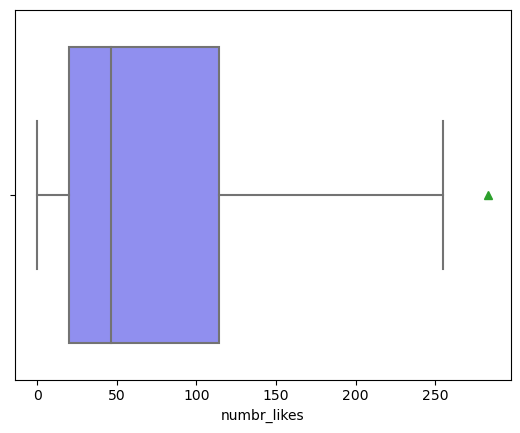

In [64]:
sns.boxplot(x = df_posts["numbr_likes"], showfliers = False, palette="cool", showmeans = True)

The 50% of the profiles in the middle of the distribution have a number of likes between 20 and 114 likes. The average (283.5) is higher the median and outside the box.

In [65]:
df_posts.isna().sum()
DT2 = dt.fread('instagram_posts.csv', columns = {"location_id", "profile_id", "cts", "post_type"})
df_posts2= DT2.to_pandas()
df_posts2.describe().applymap('{:,.2f}'.format)
df_posts2.isna().sum()

profile_id      2583292
location_id    12972772
cts                3332
post_type             0
dtype: int64

Looking to the NA values the location is the variable with more missing values (12972772)

In the next question we will discover more information about this three dataset!

### [RQ2] Let's explore the dataset by finding simple insights regarding the profile and posts.

#### Plot the number of posts for each profile in descending order.

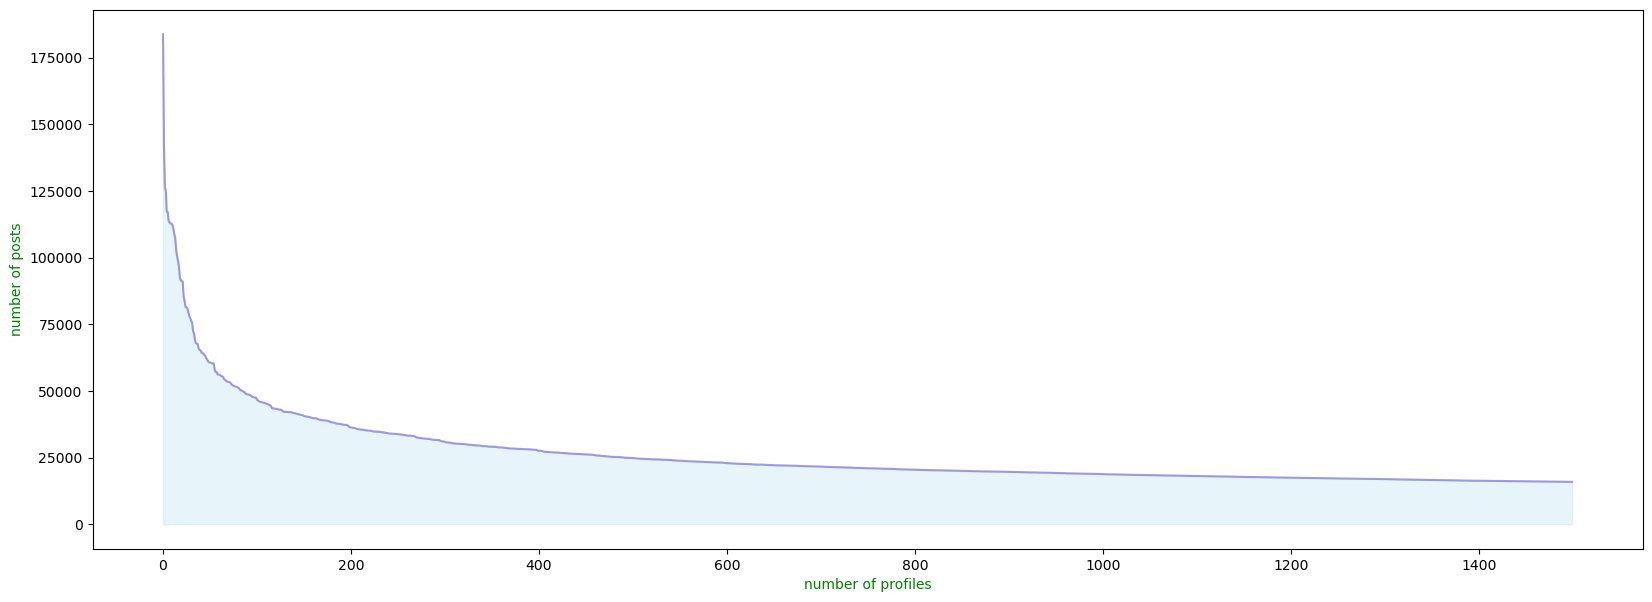

In [66]:
fn.n_posts('instagram_profiles.csv')

The number of profiles is very huge so we considered just the first 1500 profiles for number of posts. A few profiles are distinguished for a very high number of posts (the first is close to 180000 posts). All the other have less than 2500 posts.

#### What posts have the highest number of "likes"?

In [69]:
fn.posts_max_likes('instagram_posts.csv')

             post_id  numbr_likes
6293907  BwTSXBKg7gN      3586546
              post_id  numbr_likes
19624085  Bt3yaXmAM0d      8822952
              post_id  numbr_likes
24740234  BxHCrlthw9x      1918373
              post_id  numbr_likes
39701024  BqSLFVBFLfq      4264745
              post_id  numbr_likes
40754105  BsB9YrrFvIV      2726066


These posts have the highest number of likes. The first (post number Bt3yaXmAM0d) has 8822952 likes.

#### What posts have the most and the least number of comments?

In [70]:
fn.post_max_least_comments('instagram_posts.csv')

Posts which have the most number of comments
             post_id  number_comments
9383817  BzOOWj3DfZK           189888
              post_id  number_comments
12164781  BuGjhWAhAW5           313997
              post_id  number_comments
25257169  Bwarws1lCok           173988
              post_id  number_comments
33261751  BJ-rkpTgn1N           257488
              post_id  number_comments
41873060  Bx2sPAjHviO           488953
Posts which have least number of comments
       post_id  number_comments
0  BXdjjUlgcgq                0
              post_id  number_comments
10000000  Byi4MTnJZTW                0
              post_id  number_comments
20000000  Bhc5HlAHQO6                0
             post_id  number_comments
33205096  -4p625HDSI                0
              post_id  number_comments
40000000  BwsgD0OA4wG                0


These posts have the highest number of comments. The one with more comment (post Bx2sPAjHviO) has 488953 comments. For the posts with the less number of comments how seen in the table it's impossible to visualize the posts, because there is a huge number of posts that have zero comments.

#### How many posts include tagged locations, and how many do not? Show it using an appropriate chart and comment your results.

The number of posts with tagged location are:  29737425
The number of posts without tagged location are:  12972772


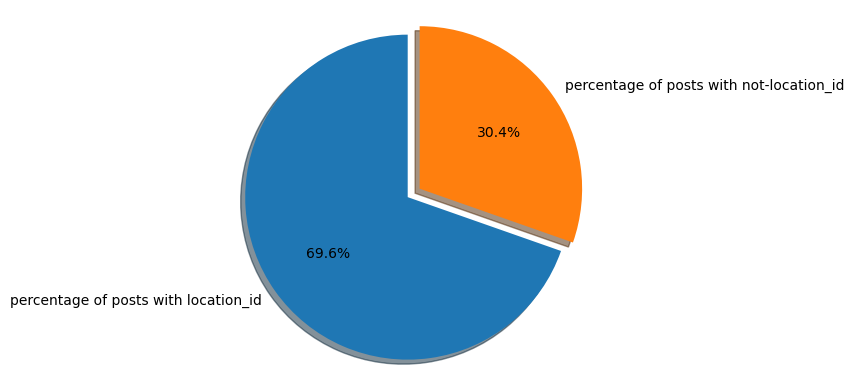

In [71]:
fn.post_locations('instagram_posts.csv')

The 69.6% of posts include a tag locations (29737425), all the others are posts where the users decided to not include in the contents the tag of the place.

#### How many posts include only photos? How many also have videos?

In [72]:
fn.counter('instagram_posts.csv')

The number of posts with only photos is:  41534486
The number of posts with only videos is:  1134768
The number of posts with photos and videos is: 40943


#### What's the percentage of business accounts vs non-business? What can you interpret regarding that percentage?

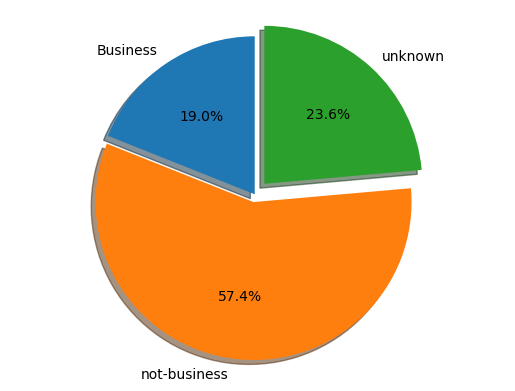

In [73]:
fn.is_business('instagram_profiles.csv')

The 57.4% of the accounts are non buisness account, the 19% of the accounts are buisness account, the remaining 23.6% is unknown. So the majority of people in instagram use it no for buisness.

### [RQ3] Now it's important to understand the most common times in which users publish their posts

#### What is the most common time in which users publish their posts?

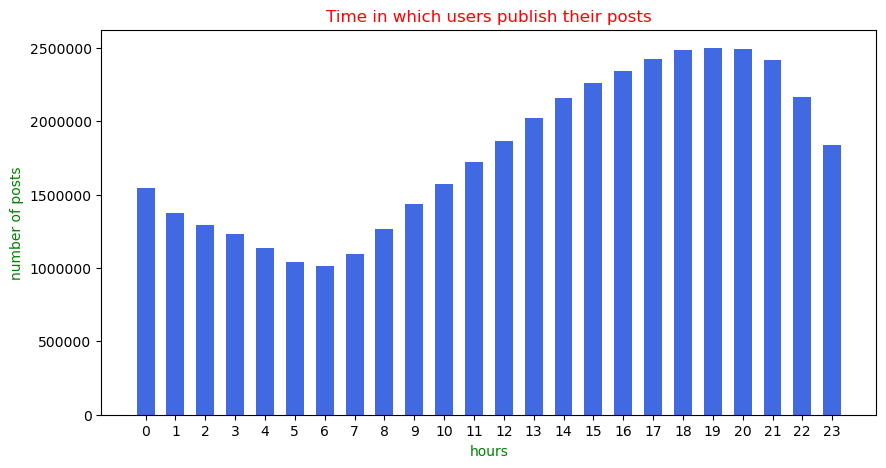

In [74]:
fn.time_posts('instagram_posts.csv')

Most of the users published their posts during the evening. 18:00 to 21:00 it's the most common time. On the other hand the morning is the time with less posts. In particular from 5:00 to 7:00. The frequency of the posts in the interval time changes sequentially increasing from the morning until the evening and later decreasing during the night.

#### Create a function that receives a time intervals list as a parameter and returns a plot with the number of posts for each given interval.

How many time intervals?


 4
 06:00:00
 09:00:00
 10:00:00
 13:00:00
 15:00:00
 19:00:00
 20:00:00
 23:00:00


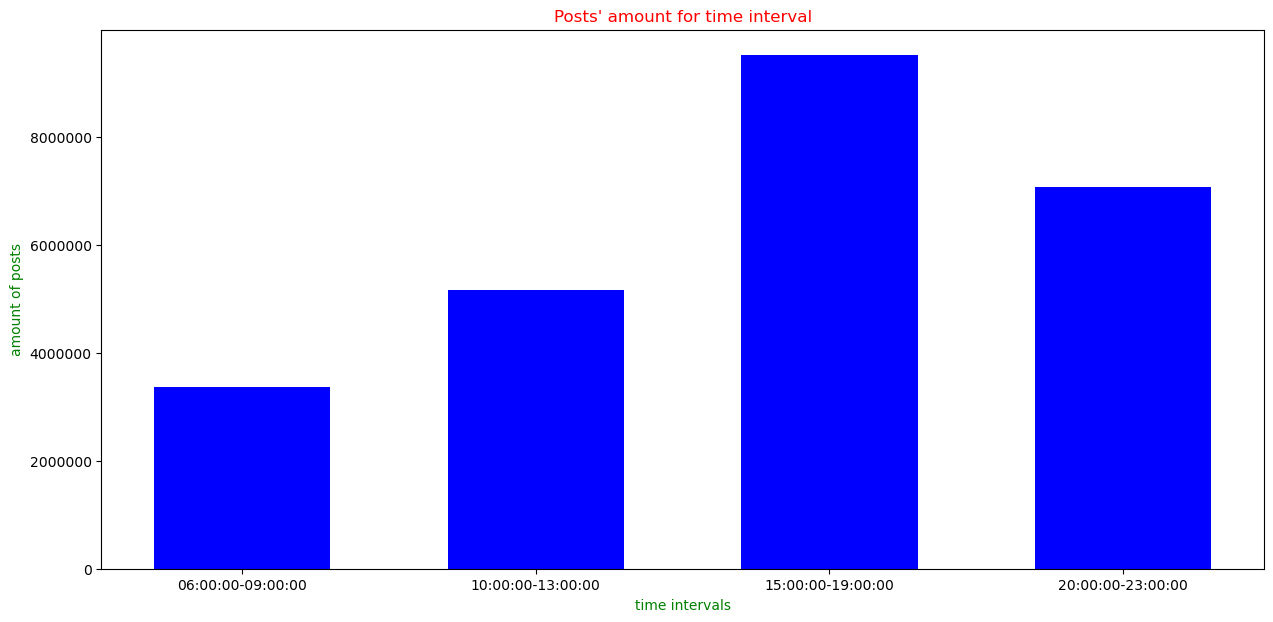

In [3]:
fn.intervals('instagram_posts.csv')

#### Use the function that you created in the previous literal to plot the number of posts between the following time intervals:

| Initial time | Final time |
|--------------|------------|
| 06:00:00     | 10:59:59   |
| 11:00:00     | 13:59:59   |
| 14:00:00     | 16:59:59   |
| 17:00:00     | 19:59:59   |
| 20:00:00     | 23:59:59   |
| 00:00:00     | 02:59:59   |
| 03:00:00     | 05:59:59   |

How many time intervals?


 7
 06:00:00
 10:59:59
 11:00:00
 13:59:59
 14:00:00
 16:59:59
 17:00:00
 19:59:59
 20:00:00
 23:59:59
 00:00:00
 02:59:59
 03:00:00
 05:59:59


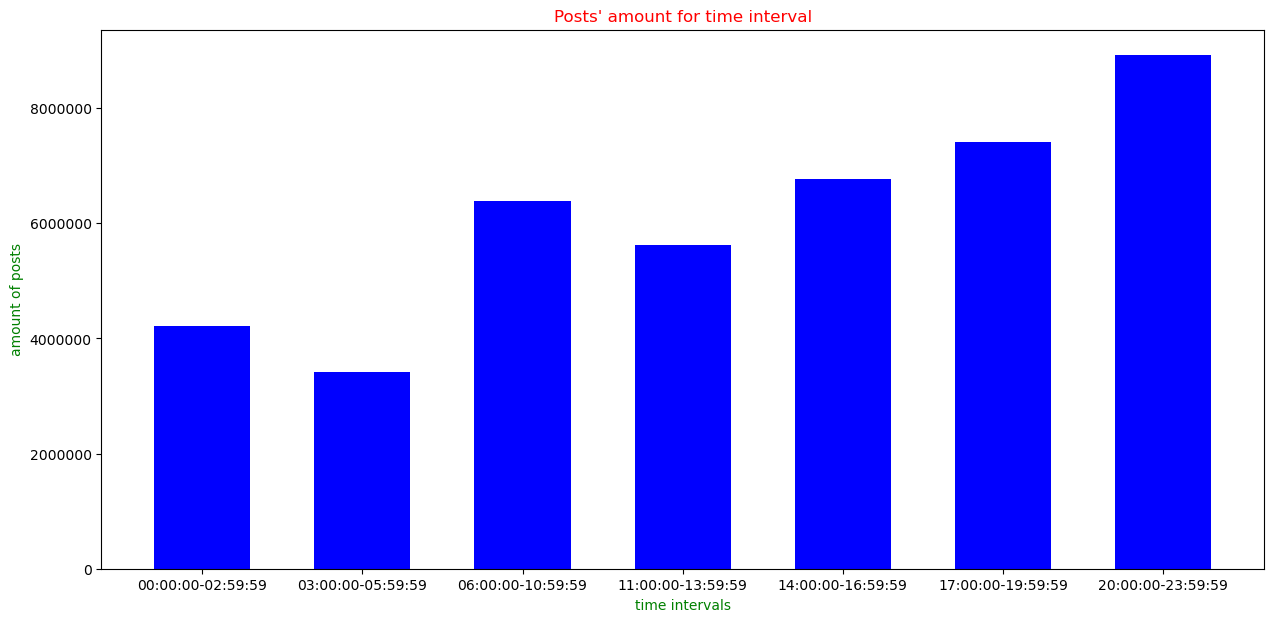

In [4]:
fn.intervals('instagram_posts.csv')

The time interval from 20:00 to 24:00 is the one with more posts. Anyway we have to consider that the time intervals have different size and changes from 3 to 5 hours.

### [RQ4] In most cases, we will not have a consistent dataset, and the one we are dealing with is not an exception (ex. in the given datasets, you may not find the information of the profiles for some of the posts). So let’s enhance our analysis.

#### Write a function that, given a profile_id, will be able to return the posts that belong to the given profile_id.

In [5]:
fn.account_posts('instagram_posts.csv')


what is the profile ID?


 2237947779


{2237947779: ['BXdjjUlgcgq', 'BeyPed5hKj9', 'Bunhd1DFVAG', 'Bppi85gliQK', 'BuDfIyslzfw', 'BxJsMDpA2yH', 'Bt5LFpZlm3z', 'BxZIzaQhS-o', 'BxRZvS0gPIA', 'BwygkNCAShv', 'Bwm7hEKHBzs', 'BwYuE0cghyB', 'BwGuhAoFSWj', 'BwBj2vhFuGH', 'Bw_XgfXA9YT', 'Bw3nuV6ACyY', 'BwJS1H9lfiJ', 'Bf6avRfheG1', 'BxMRhd2Ajgm', 'Be93_r7Bnhq', 'BtNaOjolj_n', 'BkMhROUhNbu', 'BeOMICahv0d', 'BeUrXsoB0ou', 'BvLnQ5QFHAs', 'BrZjxHllTd9', 'BeCp_INhyoh', 'BqjeI31lw-y', 'BoQpcWQB-gC', 'Bn1k1odAXa5', 'BmaTjjpBTG9', 'BmNSg2ih5ex', 'BkjvPM1Bpxa', 'Bg22N6AhebK', 'BgS2rd4BozM', 'Bc6jrZIHttD', 'BgDZmg1D0If', 'Bf-QTObhSmW']}


In the dictionary there is for each key (the profile_id), the posts of that profile

#### Write another function that, given an input n (an integer), will return the posts that belong to the n top posted profiles (top n profiles that have posted the highest number of posts) that their data is available in the profile.csv using the previously written function.

In [2]:
fn.tuttipostxtopn('instagram_posts.csv','instagram_profiles.csv')

How many profile_id? 


 5


{199664772: ['Bq3hP3Khp8J', 'Bq3hN53hUsD', 'BCqCe9LypeF', '20Wu4zypd2', 'BrKq76AhadU', 'Bq_MjFzB_Wt', 'Bq_MiKhhP05', 'BpQ2cmKF-W0', '3V4OeXypTT', 'BzUmjr2pgni', 'BzUmictJSO1', 'BzUmhW0pjrN', 'BzUmgscJEK4', 'BzUmgBYJzoS', 'BzUmfZspDqA', 'BzUmejDptYx', 'BzUmdnupYxW', 'BzUmcZRpTTn', 'BzScUjhJiwK', 'BzRkojLJBMQ', 'BzRkmb3JXea']}
{8563366588: ['BxJpvMrpl0n', 'BxJpeX2pXeN', 'BxJptNSpk6g', 'BxJpzW4J6Aq', 'BxJpgQMJa66', 'BxJp2qgpVJo', 'BxJpxSLp4rB', 'BxJpcZ0JRqN', 'BxJp4i3pArJ', 'BxJpq3dppxY', 'BxJp6dVJvtO', 'BxJposzpeA7', 'BxJpmohpwK2', 'BxJpkrrJ0b3', 'BxJpijSJd_f']}
{1273455368: ['BpfufadAl1f', 'Bz6mD1VpaJB', 'BuCyAT8Abu3', 'BxD_1nXgoBG', 'BvYZl1yAubo', 'BrkhuwcATjv', 'BwMTtZ5g4RY', 'Brt9v5VATSp', 'Bx7F9xKJCN2', 'BvNCnhMgdAl', 'ByBp307pDMh', 'ByPPM0Mps4a', 'ByPPFlhJrbA', 'Bz7fTyVpLLQ', 'Bz7a1vgJzl2', 'Bz6mutIJCHA', 'Bz6mkhBpul2', 'Bz6mbkwHeJJ', 'Bz6mHZFp3zI', 'Bz6mAlXpyCK', 'Bz6l-HkpF8G', 'Bz6lo6RpKQF', 'Bz6VVamJ73y', 'Bz4nObeJBHe', 'BvJIB8PgrRJ']}
{9813508: ['BuUnJu0Al2B', 'BuUoORyAH_f', 'B

For each key (profile_id), the post codes of those profiles are present

#### What is the average number of "likes" and comments of the top 10 profiles with the highest number of posts which their information is available in profile.csv?

In [2]:
fn.likecom_top10('instagram_posts.csv','instagram_profiles.csv')

C:\Users\matti\OneDrive\Desktop\ADM\HW2\functions.py:281: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mergegroup0 = df_merge0bis.groupby(["profile_name","profile_id", "n_posts"])["numbr_likes", "number_comments"].mean()


,,,Average number of likes,Average number of comments
profile_name,profile_id,n_posts,,
jasem33312,1.996648e+08,183730.0,7.67,0.00
koenigpic,8.563367e+09,142428.0,0.00,0.00
rudyanto62,1.273455e+09,126340.0,2.96,0.04
hometown_ni,9.813508e+06,125220.0,0.30,0.00
dwfitfiber_thailand,1.607309e+09,117262.0,1.54,0.00
waxking911,1.087614e+09,117099.0,2.03,0.18
gamt_official,1.603890e+09,113780.0,6.48,0.04
collarosedw_official,2.181730e+08,113182.0,0.40,0.04
gamt_authentic,2.855497e+08,112777.0,3.92,0.00


The profiles with the most posts overall have very low average likes: Jasem3312 is the user among these 10 with the most likes on average and they are only 7.67. The situation is no different for comments. In fact, the highest average concerns waxking911 with 0.18 comments on average.

#### Plot the number of posts that these top 10 profiles have sent on Instagram in the given interval in question RQ3. Interpret the resulting chart.

How many time intervals?


 7
 06:00:00
 10:59:59
 11:00:00
 13:59:59
 14:00:00
 16:59:59
 17:00:00
 19:59:59
 20:00:00
 23:59:59
 00:00:00
 02:59:59
 03:00:00
 05:59:59


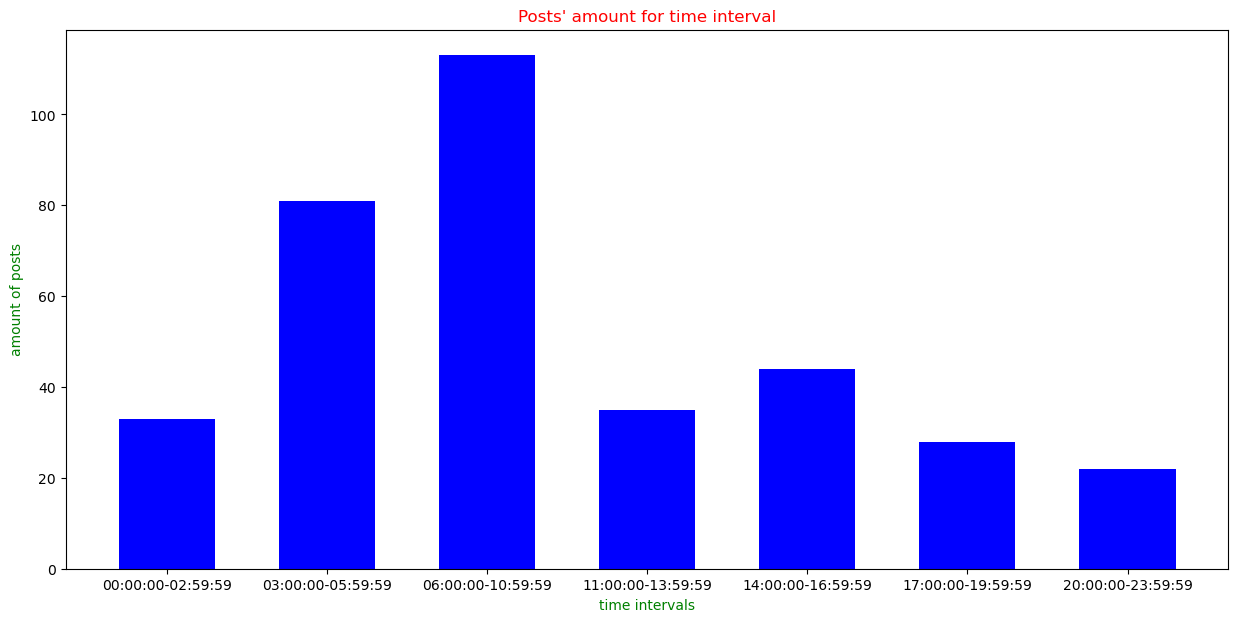

In [3]:
fn.top_10_intervals('instagram_posts.csv','instagram_profiles.csv')

The majority of the posts are published in the time interval 06:00-11:00 while the time when were posted less posts it's the one from 20:00 to 00:00. 

### [RQ5] The most influential users are the ones with the highest number of “followers", you can now look more into their activity.

#### Plot the top 10 most popular users in terms of followers and their number of posts.

,profile_name,n_posts
2880218,instagram,5760.0
2582507,victoriassecret,7355.0
3820939,nba,28816.0
701965,louisvuitton,3352.0
2414951,buzzfeedtasty,2791.0
2785241,andresiniesta8,990.0
333193,hm,4566.0
3934581,princessyahrini,4719.0
1311970,danbilzerian,1311.0
1703764,akshaykumar,1173.0


None [Text(0.5, 0, 'Top 10 influencers (profiles with more followers)'), Text(0, 0.5, 'Number of posts')]


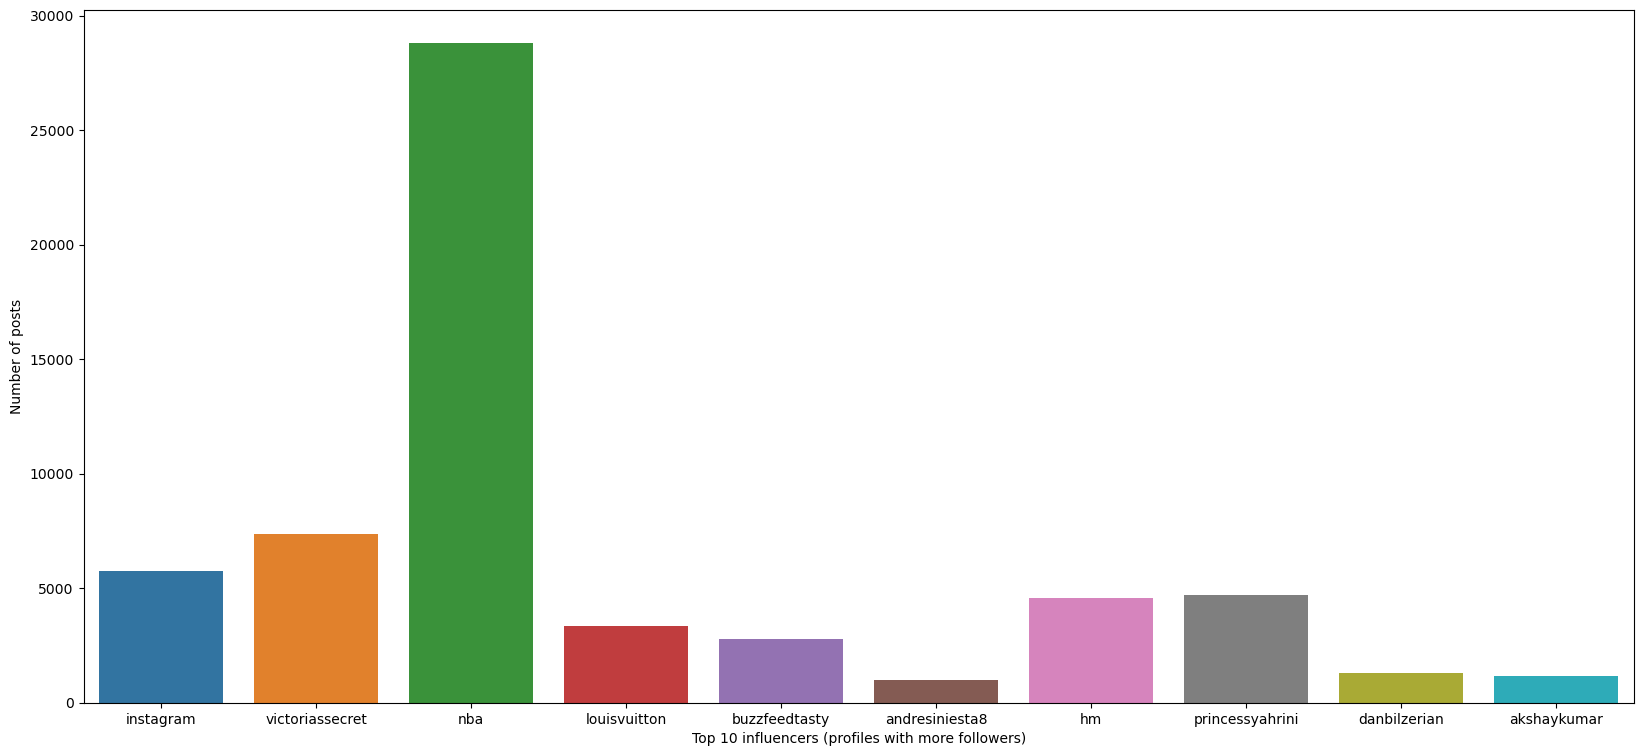

In [2]:
fn.post_top10('instagram_profiles.csv')

The most popular users in terms of followers are Instagram, victoriassecret and nba. In the barplot it's possibile to watch in the x axis all the top 10 profiles and in y axis the amount of posts that the profiles postes. Instagram postes 5760 times. Nba is the one who posted most with 28816 posts.

#### Who is the most influential user?

In [3]:
fn.top1('instagram_profiles.csv')

,profile_id,profile_name,following,followers,n_posts
2880218,25025320.0,instagram,226.0,285457645.0,5760.0


The most influential user is Instagram with 285457645 followers

#### Have they posted anything with tagged locations? Extract the most frequent areas on their posts and plot the number of times each city has been visited.

Sydney, Australia                 9
Victoria's Secret                 4
Kobe-shi, Hyogo, Japan            3
Wells Fargo Center                2
Bel-Air Estate                    2
Bora Bora, French Polynesia       2
上海展覽中心                            1
Universiteitstheater Amsterdam    1
Long Chim Singapore               1
Isles of Scilly                   1
Name: name, dtype: int64

C:\Anaconda\envs\env-AMD\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda\envs\env-AMD\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 28023 (\N{CJK UNIFIED IDEOGRAPH-6D77}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda\envs\env-AMD\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23637 (\N{CJK UNIFIED IDEOGRAPH-5C55}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda\envs\env-AMD\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 35261 (\N{CJK UNIFIED IDEOGRAPH-89BD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda\envs\env-AMD\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_

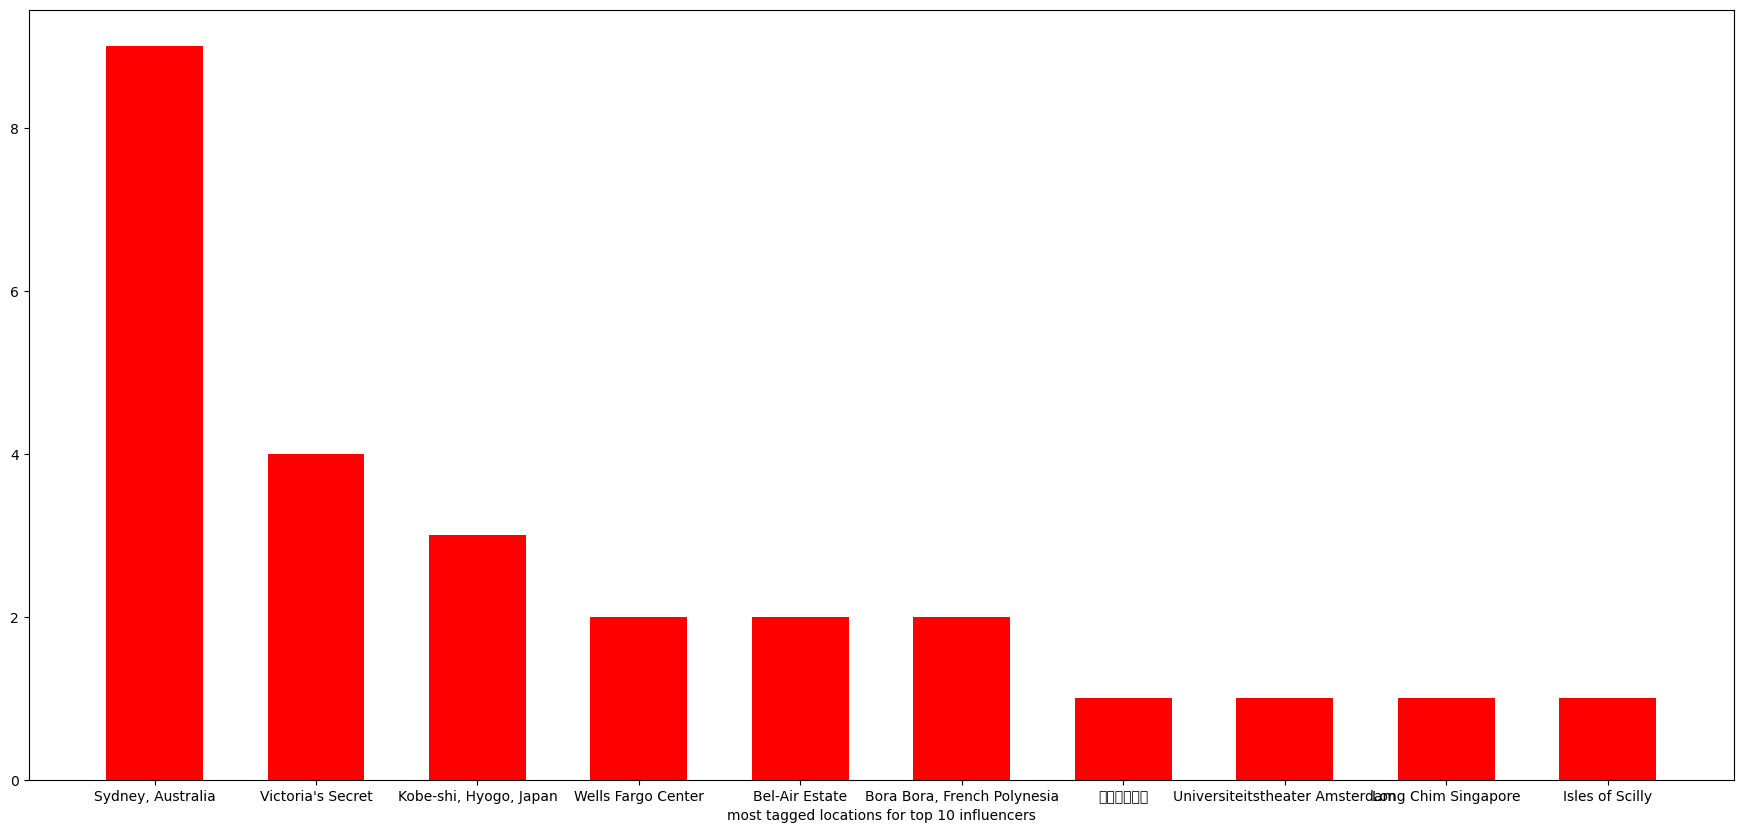

(None, None)

In [2]:
fn.toplocations('instagram_posts.csv','instagram_profiles.csv','instagram_locations.csv')

We considered the locations in the coloumns "name" because it's the most precise information to know where people went.
The most frequent area for the top 10 most popular influencer is Sydney, Australia with 9 tag. At the second place Victoria's secret shop with 4 tag and at the third place Kobe-Shi in Japan with 3 tag. We have to consider that the variable "location" have a lot of missing value so it's difficult to know where all the pictures have been taken.

#### How many pictures-only posts have they published? How many reels? (only videos) and how many with both contents? Provide the number as percentages and interpret those figures.

,post_type,Number of post
0,1,128
1,2,13


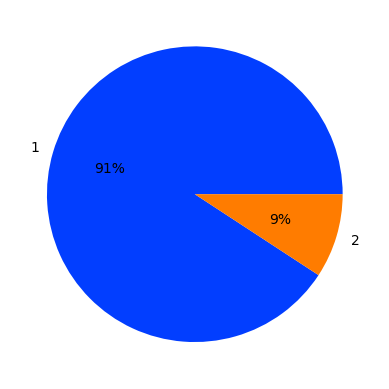

(None, None)

In [3]:
fn.pic_video('instagram_posts.csv','instagram_profiles.csv')

The 91% (128) of the posts are type 1: pictures. Only the 9% (13) is type 2: videos, and there are not posts with both contents.

#### How many "likes" and comments did posts with only pictures receive? How about videos and mixed posts? Try to provide the average numbers and confront them with their followers amount, explaining what you can say from that comparison.


In [4]:
fn.like4followers('instagram_posts.csv','instagram_profiles.csv')

,Average number of likes,Average number of comments
post_type,,
1,577276.95,4269.06
2,436755.18,2952.95


the average of followers for the top10 profile is: 58749283.5


(None, None)

The type 1 posts (the one with only pictures) has more likes and comments than the type 2 (videos). It's possible to see the values in the table.
Let's confront the averages of likes and comments with their followers amount.
- The average number of likes for the pictures is the 0.98% of the followers average.
- the average number of comments for the pictures is the 0.07% of the followers average.
- the average number of likes for the video is the 0.74% of the followers average.
- the average number of comments for the video is the 0.05% of the followers average.

### [RQ6] It's time to get information from the user posting effectiveness.

#### What is the average time (days and minutes) a user lets pass before publishing another post? Plot the top 3 users that publish posts more frequently (calculate the average time that passes between posts), including their amount of followers and following. Provide insights from that chart.

Days: 24 and Minutes: 332.03
Days: 24 and Minutes: 332.03


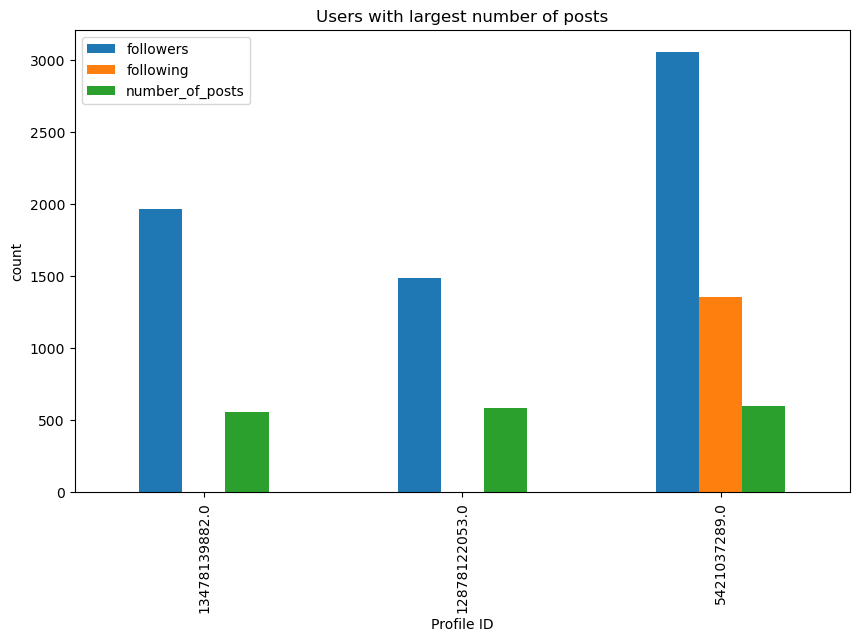

(None, None)

In [2]:
fn.RQ6_1('instagram_posts.csv','instagram_profiles.csv')

The results may be skewed because some users post extremely fast, and there is a very high chance that these users are bots. Have as little as 0 seconds between one post and the other, which is humanely impossible.

#### Using the function you previously coded, plot the time intervals with the highest average number of “likes” and the ones with the highest average number of comments on posts.


How many time intervals?


 7
 06:00:00
 10:59:59
 11:00:00
 13:59:59
 14:00:00
 16:59:59
 17:00:00
 19:59:59
 20:00:00
 23:59:59
 00:00:00
 02:59:59
 03:00:00
 05:59:59


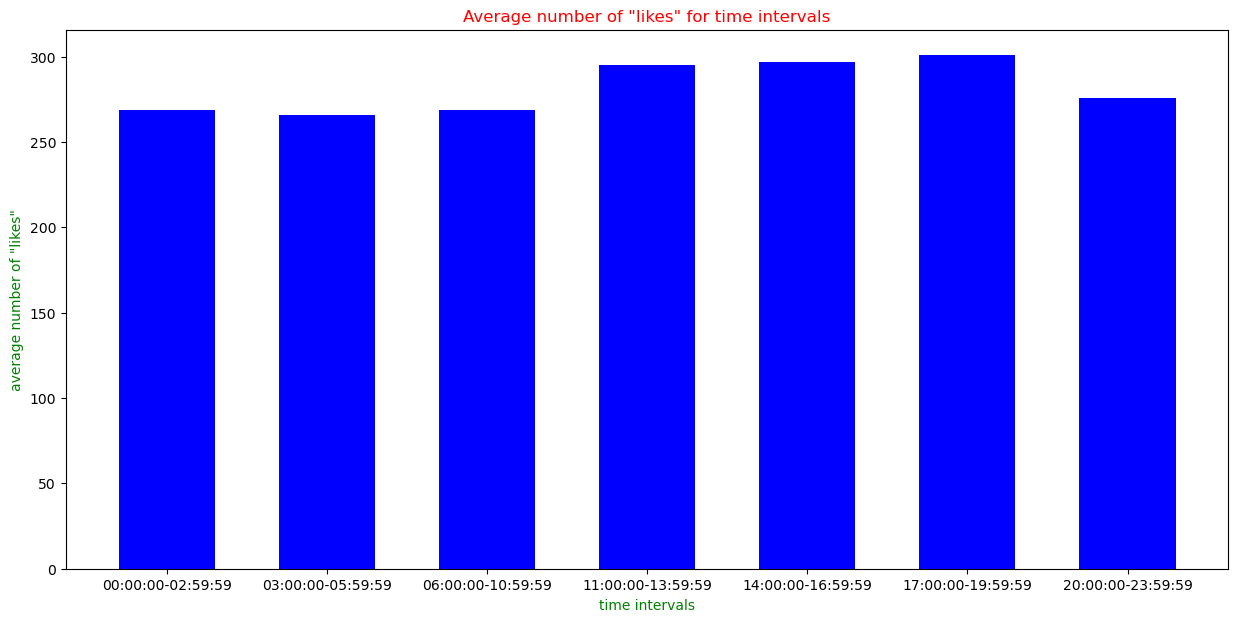

(None,
 {'00:00:00-02:59:59': 268.7,
  '03:00:00-05:59:59': 265.7,
  '06:00:00-10:59:59': 268.8,
  '11:00:00-13:59:59': 294.9,
  '14:00:00-16:59:59': 297.0,
  '17:00:00-19:59:59': 300.7,
  '20:00:00-23:59:59': 276.0})

In [2]:
fn.intervals_RQ6('instagram_posts.csv','numbr_likes','average number of "likes"','Average number of "likes" for time intervals')

The average of likes is pretty the same in all the time interval, even if, to be more specific there are a few more likes in the daily hours from 11:00 to 20:00 (between an average of 294.9 and 300.7 likes).



How many time intervals?


 7
 06:00:00
 10:59:59
 11:00:00
 13:59:59
 14:00:00
 16:59:59
 17:00:00
 19:59:59
 20:00:00
 23:59:59
 00:00:00
 02:59:59
 03:00:00
 05:59:59


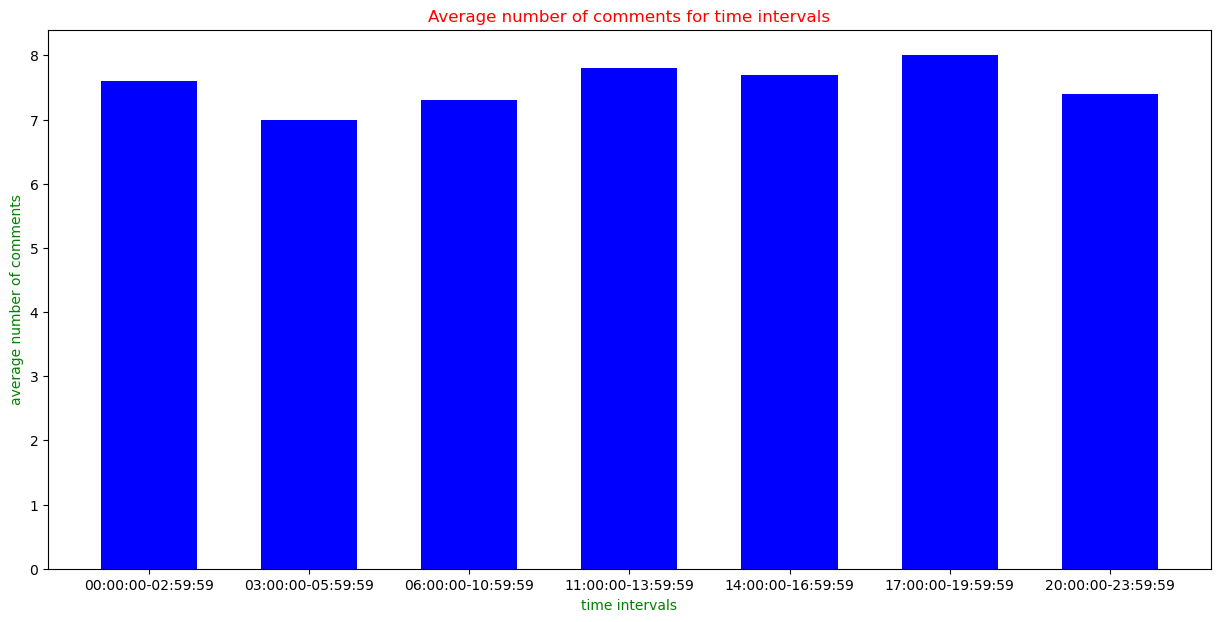

(None,
 {'00:00:00-02:59:59': 7.6,
  '03:00:00-05:59:59': 7.0,
  '06:00:00-10:59:59': 7.3,
  '11:00:00-13:59:59': 7.8,
  '14:00:00-16:59:59': 7.7,
  '17:00:00-19:59:59': 8.0,
  '20:00:00-23:59:59': 7.4})

In [3]:
fn.intervals_RQ6('instagram_posts.csv','number_comments','average number of comments','Average number of comments for time intervals')

For what concern the comments the situation is more confusionary and there is not a specific logic. All the interval time have an average of comments between 7.0 to 8.0

### [RQ7] Of course, calculating probabilities is a job that any Data Scientist must know. So let's compute some engaging figures.

#### What's the probability that a post receives more than 20% "likes" of the number of followers a user has?

In [4]:
fn.prob_likes('instagram_posts.csv','instagram_profiles.csv')

The probability that a post receives more than 20% "likes" of the number of followers a user has is:  15.73  %


#### Do users usually return to locations? Extract the probability that a user returns to a site after having posted it in the past. Does that probability make sense to you? Explain why or why not.

In [5]:
fn.prob_loc('instagram_posts.csv','instagram_profiles.csv','instagram_locations.csv')

The probability that a user returns to a site after having posted it in the past is:  19.35  %


### [RQ8] Every decision you take in a data-based environment should be reinforced with charts, statistical tests and analysis methods to check whether a hypothesis is correct or not.

#### Does more “likes” also mean more comments? Plot a scatter plot of “likes” vs comments for posts.

0.3744527992509993


(None, <AxesSubplot:xlabel='numbr_likes', ylabel='number_comments'>)

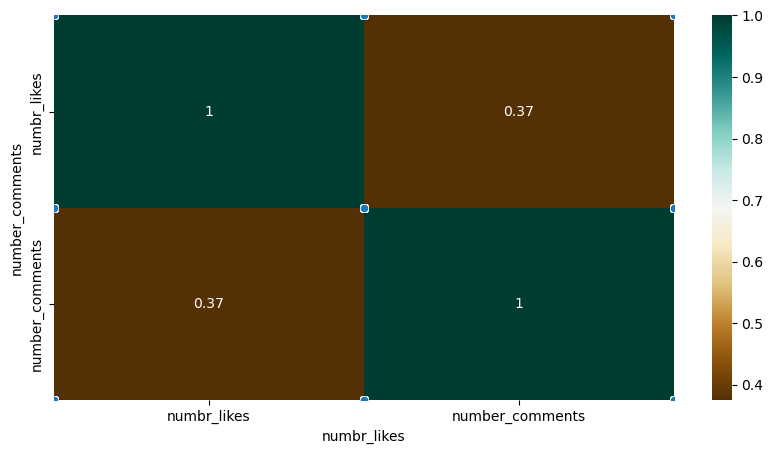

In [6]:
fn.like_comm('instagram_posts.csv')

Pearson's correlation index measures the linearity and thus the correlation between two quantitative variables. We then used it to study how much the value of "likes" affects the value of "comments" and viceversa. The index has values between -1 and 1. In the case where this is -1 we are faced with a negative correlation and thus on average more "likes" means fewer "comments" and viceversa. In case this is equal to 1 there is a positive correlation and therefore when a post has many "likes" on average there will also be many "comments" and vice versa. The index in our case measures 0.37. Since this is close to zero there is no strong linear correlation.

#### Can you find any significant relationship between the time a user publishes a post and the number of comments and “likes”? Use an appropriate statistical test or technique and support your choice.


In [7]:
l=[]
    
for i in range(2):
            li=[]
            s=(datetime.strptime(input(), '%H:%M:%S').time())
            f=(datetime.strptime(input(), '%H:%M:%S').time())

            li.append(s)
            li.append(f)
            l.append(li)
def time_slots (x):
            for i in l:
                if i[0]<=x<=i[1]:
                    return str(i[0])+'-'+str(i[1])
                else:

                    continue
dt_posts = dt.fread('instagram_posts.csv',columns={'cts','numbr_likes'})
df_posts = dt_posts.to_pandas()
df_posts['cts']=(pd.to_datetime(df_posts['cts'],format='%H:%M:%S').dt.time)

    
a =df_posts.groupby('cts').apply(lambda x :x).sample(50)
l_evening=[]
l_morning=[]
for i,j in zip(a.cts,a.numbr_likes):
            if time_slots(i)=='17:00:00-22:00:00':
                l_evening.append(j)
            elif time_slots(i)=='08:00:00-12:00:00':
                l_morning.append(j)

print(l_evening)
print(l_morning)
            





 08:00:00
 12:00:00
 17:00:00
 22:00:00


[1947.0, 59.0, 42.0, 14.0, 1969.0, 5.0, 158.0, 36.0, 3.0, 3.0, 24.0]
[110.0, 33.0, 99.0, 74.0, 30.0, 588.0, 30.0, 21.0, 23.0]


First of all we have to check if my samples are distributed like Normals, I can use scipy.shapiro test in order to determine it.
If pvalue is greater than 0.05 my sample is distributed like a Normal, so we apply t_test for the means.
Otherwise we have to aplly a not-parametric test like U Mann Whitney-test

The aim of our test is:"Is there a significant difference between the average of comments/likes between posts published in the morning and those posted in the evening"

Let's set two hypothesis:

###### Ho : u(evening)=u(morning), hypothesis null
###### H1 : u(evening)!=u(morning), contrary hypothesis




In [8]:
if stats.shapiro(l_morning)[1] > 0.05 and stats.shapiro(l_evening)[1]>0.05:
    print('They are Normals')
    
    print(stats.ttest_ind(a=l_morning,b=l_evening))
    
    
else:
    print('Nope')
    print(stats.mannwhitneyu(l_morning,l_evening,use_continuity=False))
    
    
    
          




Nope
MannwhitneyuResult(statistic=56.0, pvalue=0.6211643154665393)


In this case P-value is higher than alpha (in this test we consider alpha = 0.05): there is no evidence of a statistically significant difference between the two distributions.
So we cannot exclude that the time a post is published does not affect the number of likes


Repeat for comments

In [9]:
l=[]
    
for i in range(2):
            li=[]
            s=(datetime.strptime(input(), '%H:%M:%S').time())
            f=(datetime.strptime(input(), '%H:%M:%S').time())

            li.append(s)
            li.append(f)
            l.append(li)
def time_slots (x):
            for i in l:
                if i[0]<=x<=i[1]:
                    return str(i[0])+'-'+str(i[1])
                else:

                    continue
dt_posts = dt.fread('instagram_posts.csv',columns={'cts','number_comments'})
df_posts = dt_posts.to_pandas()
df_posts['cts']=(pd.to_datetime(df_posts['cts'],format='%H:%M:%S').dt.time)

    
a =df_posts.groupby('cts').apply(lambda x :x).sample(50)
l_evening=[]
l_morning=[]
for i,j in zip(a.cts,a.number_comments):
            if time_slots(i)=='17:00:00-22:00:00':
                l_evening.append(j)
            elif time_slots(i)=='08:00:00-12:00:00':
                l_morning.append(j)

print(l_evening)
print(l_morning)
            


 08:00:00
 12:00:00
 17:00:00
 22:00:00


[0.0, 54.0, 9.0, 10.0, 2.0, 1.0, 2.0, 0.0, 3.0, 0.0, 1.0, 1.0, 6.0, 3.0, 0.0, 7.0, 230.0, 0.0, 6.0]
[0.0, 3.0, 2.0, 33.0, 8.0, 1.0, 1.0, 6.0]


In [10]:
if stats.shapiro(l_morning)[1] > 0.05 and stats.shapiro(l_evening)[1]>0.05:
    print('They are Normals')
    
    print(stats.ttest_ind(a=l_morning,b=l_evening))
    
    
else:
    print('Nope')
    print(stats.mannwhitneyu(l_morning,l_evening,use_continuity=False))

Nope
MannwhitneyuResult(statistic=80.5, pvalue=0.8092226474220642)


Even in this case P-value is higher than alpha (in this test we consider alpha = 0.05): there is no evidence of a statistically significant difference between the two distributions.

#### What’s the distribution of followers? Plot the empirical distribution of followers amongst all users and extract the mean, mode, and quantiles. Interpret those figures.

the average of followers for profile is: 4739.899180397426
The mode of the distribution is: 0    0.0
Name: followers, dtype: float64
The first quantile of the distribution is: 159.0
The third quantile of the distribution is: 974.0


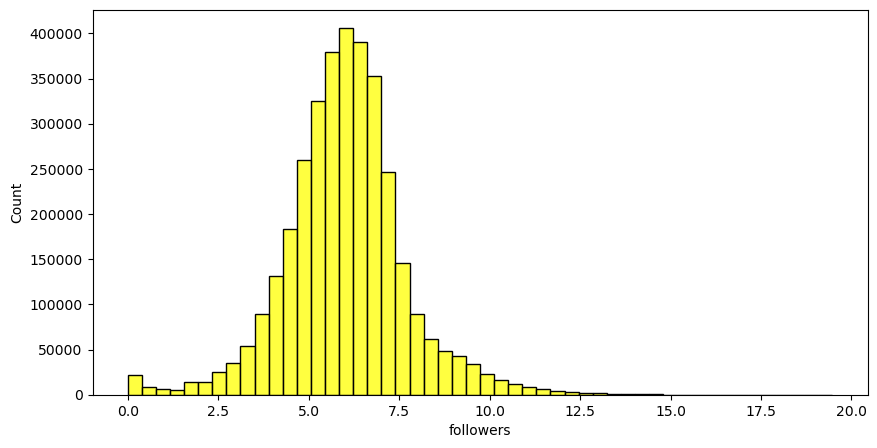

In [11]:
fn.followers('instagram_profiles.csv')

to create the grapich first of all we remove all the NA values.
the graph is legible if we apply to the distribution a rescaling in a logaritmic scale. To remove the problem of the profiles that have zero followers and that are a problem because a logaritmo in zero don't exist we apply a function to increase all the numbers by 1. This doesn't make big changes to the distribution but now it's possible to represent the grapich.
it's possible now creates the graph.

#### What are histograms, bar plots, scatterplots and pie charts used for?

- A histogram is a graphical representation of the distribution of a set of statistical data made through the use of bars that can be horizontal (horizontal bar histogram) or vertical (vertical bar histogram). This Cartesian graph is used to describe the class distribution of a quantitative variable with widely varying values. The histogram is constructed by dividing the values of the variable into classes. There will be as many rectangles as there are classes and they will all be placed side by side on a horizontal axis according to the size of the class. The height of the rectangle will depend on the number of observations that belong to that class.
- The barplot is used to show the relationship between a quantitative and a qualitative variable. Usually the quantitative variable shows the frequencies of the values of a qualitative variable. The representation is always through bars that are, however, detached. On the x-axis there are the modes of the qualitative variable and on the x-axis there are the values of the quantitative variable.
- The scatter plot is a Cartesian graph on which two quantitative variables are plotted, one on each axis. Instead, each point on the graph represents a unit of the collective given the numerical values they take on the axes (and thus for the variables). The scatterplot is thus a good way to visualize the relationship between the two variables and study their correlation (linear dependence), for example. If the pattern of points on the graph falls from top left to bottom right we are suggested a negative correlation, if the trend, on the other hand, is from bottom left to top right a positive correlation.
- A pie chart is a circumference divided into pieces. Each piece represents the count or percentage of observations of a variable. Consequently, this graph is useful for illustrating the relationship between parts and an integer when there are few modes, however.

#### What insights can you extract from a Box Plot?

- A boxplot is a graph that allows you to visualize the center and the distribution of data. It is therefore useful for studying its variability.
The boxplot consists of 5 basic numbers represented in the graph: the lower truncation, the first quartile (Q1), the median (Q2), the third quartile (Q3), and the upper truncation. In case there are outliers in the distribution, these can also be displayed.
Q1,Q2,Q3, mentioned above, are position indices that are calculated by sorting the data in ascending order and dividing the data set into four intervals of equal numerosity. The values the data take at one quarter, one half and three quarters of the distribution are then taken.

## Algorithmic Question


##### [AQ1] Given the following pseudocode, answer the questions:




What is the output of this algorithm? Describe the mechanism of the algorithm in detail . We do not want to know only its final result. (Describe one example on your own)
What is asymptotically (i.e., we are asking for big-O complexity) the algorithm's running time as a function of N?
Is this algorithm the optimal one to produce this output? If not, can you suggest a better algorithm to perform the same task?

This algorithm prints out the permutations of the list that is given to it. The output includes each element of the permutation, and each permutation is seperated by a line. This algorithm uses recurrsion, and recurrsion is when a function calls itself. The main function called f2 takes 3 input. A list, a start and an end. the first thing the function does is it checks if the start and end are the same. If they are, another function called f1 is called, the inputs of this function is a list and a parameter called end. What this function does is that it prints elements of the list passed to it in order. If the start == end condition is not met, the f2 function starts swapping around the elements in the list based on a loop and the start parameter. if the start parameter and the loop are the same, nothing really happens to the list. If they are different, a temp variable is utilized to swap the elements. In the middle of the loop iteration, f2 is recursively called, this time with a start variable 1 larger than what it was initially. The condition is then checked again, however, the swapping really starts when i and start are different, and this can never be the case at the beginning of an f2 call. This keeps repeating till the f1 function is finally called (as the start keeps increasing with each f2 call till it becomes equal to the value of end). The current list is printed and then the previous call of f2 keeps running after the f2 call inside it finally comes to an end. Then, the iteration finally comes to end and now the i is different than the start, which means the list elements start swapping. This keeps repeating till all calls of f2 are fulfilled and all permutations are printed. A python implementation of this function as well as an example can be found in the next cell. As seen in the example below, the first print includes the original order of the list. This happened because the f2 function kept getting called with start +=1 with any change in the i. As a result, end and start became equalt to each other without any swaps happening and the list was printed without any swaps. As we exit the current call of f2, we return to the one before where i changes and as a result elements in the index sequence [i] and sequence [start] swap till the start becomes the same as end and the f1 function is called to reflect the changes in the list.

In [4]:
import time

In [49]:
def f1 (sequence,end):
    for i in range(end):
        print(sequence[i])
    print('\n')
def f2(sequence,start,end):
    if start == end:
        f1(sequence,end)
    else:
        for i in range(start , end,1):
            temp = sequence[start]
            sequence[start] = sequence[i]

            sequence[i] = temp

            f2(sequence,start+1,end)
            temp = sequence[start]
            sequence[start] = sequence[i]
            sequence[i] = temp

f2([1,2,3],0,3)


1
2
3


1
3
2


2
1
3


2
3
1


3
2
1


3
1
2




The big O complexity of the algorithm's running time as a function of n is O(n!). This means that the function scales really badly as the input size increases. Below is a plot showing how quickly the run time of the function increases. The scatter plot shows the time executed when for each n where the input size is n. It jumps drastically from n = 8 to n = 9. The output for the function had to be cleared for the visibility of the notebook as the number of permutations for n = 9 alone is 9! = 362880.

In [ ]:
exec_time = []
inputs = []
for i in range(2,11,1):
    range_1 = range(1, i)
    list_1 = list(range_1)
    start = time.time()
    f2(list_1,0,i-1)
    end = time.time()
    change = end-start
    exec_time.append(change)
    inputs.append(i-1)
    #print(i-1,list_1)
print(exec_time)
print(inputs)

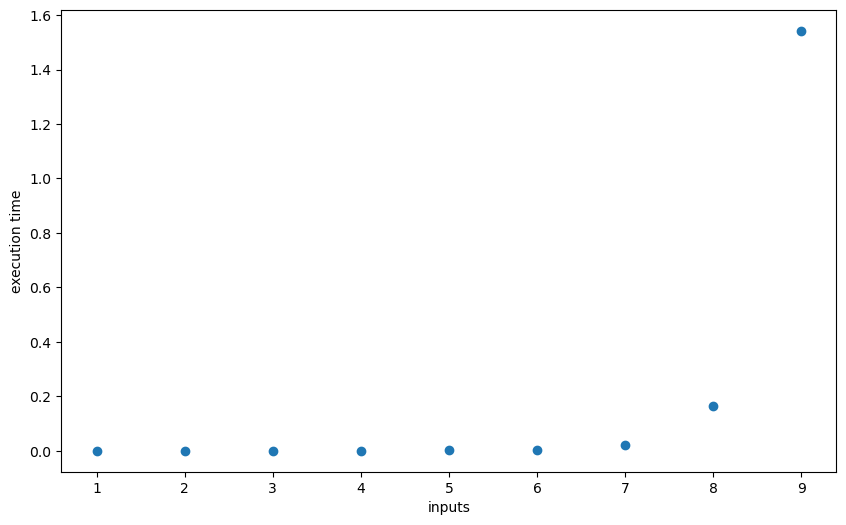

In [44]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(inputs, exec_time)
ax.set_xlabel('inputs')
ax.set_ylabel('execution time')
plt.show()

- Is this algorithm the __optimal__ one to produce this output? If not, can you suggest a <ins>better algorithm</ins> to perform the same task?

After trying to implement the algorithm in 2 different ways, where the main change is in the swapping technique, the time complexity still remained the same (as shown below).

In [ ]:
def permute(lst,f=0):
  if f >= len(lst):
    for i in lst:
      print(i)
    print('\n')
    return
  for s in range(f,len(lst)):
    lst[f],lst[s] = lst[s],lst[f]
    permute(lst,f+1)
    lst[f],lst[s] = lst[s],lst[f]

In [ ]:
import time
inputs = []
exec_time = []
for i in range(2,11,1):
    range_1 = range(1, i)
    list_1 = list(range_1)
    start = time.time()
    permute(list_1)
    end = time.time()
    change = end-start
    exec_time.append(change)
    inputs.append(i-1)
    #print(i-1,list_1)
print(exec_time)
print(inputs)

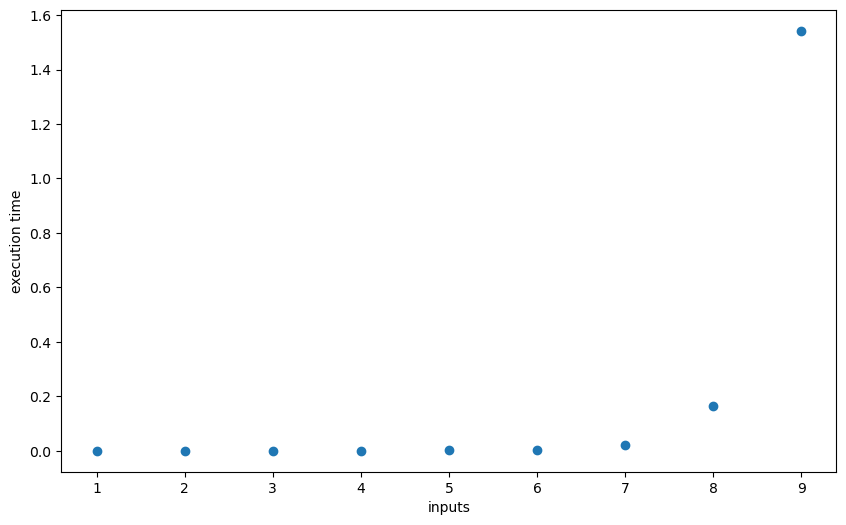

In [45]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(inputs, exec_time)
ax.set_xlabel('inputs')
ax.set_ylabel('execution time')
plt.show()

In [ ]:
def perm1(lst):
  if len(lst) == 0:
    return []
  elif len(lst) == 1:
    return [lst]
  else:
    l=[]
    for i in range(len(lst)):
      x = lst[i]
      xs = lst[:i] +lst [i+1:]
      for p in perm1(xs):
        l.append([x]+p)
    return l


In [ ]:
inputs = []
exec_time = []
for i in range(2,11,1):
    range_1 = range(1, i)
    list_1 = list(range_1)
    start = time.time()
    for p in perm1(list_1):
      for j in p:
        print (j)
      print('\n')
    end = time.time()
    change = end-start
    exec_time.append(change)
    inputs.append(i-1)
    #print(i-1,list_1)
print(exec_time)
print(inputs)

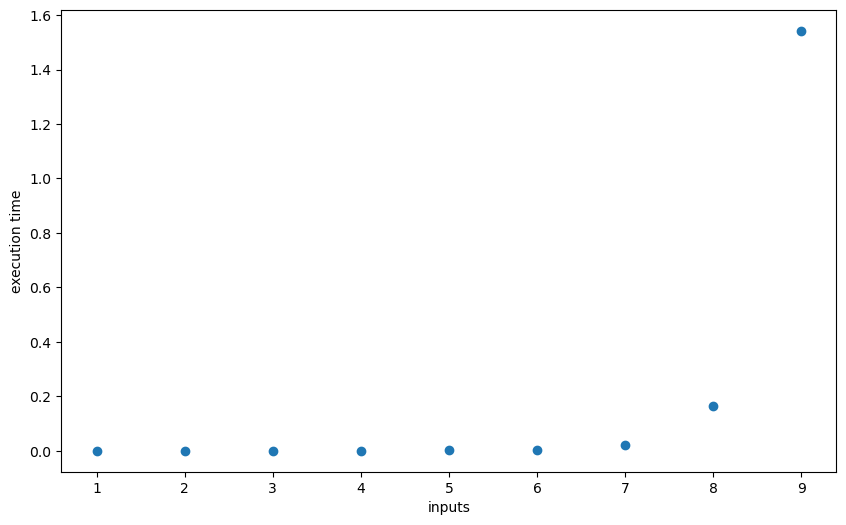

In [46]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(inputs, exec_time)
ax.set_xlabel('inputs')
ax.set_ylabel('execution time')
plt.show()

In [ ]:
from itertools import permutations

In [ ]:
inputs = []
exec_time = []
for i in range(2,11,1):
    range_1 = range(1, i)
    list_1 = list(range_1)
    start = time.time()
    for p in permutations(list_1):
      for j in p:
        print (j)
      print('\n')
    end = time.time()
    change = end-start
    exec_time.append(change)
    inputs.append(i-1)
    #print(i-1,list_1)
print(exec_time)
print(inputs)

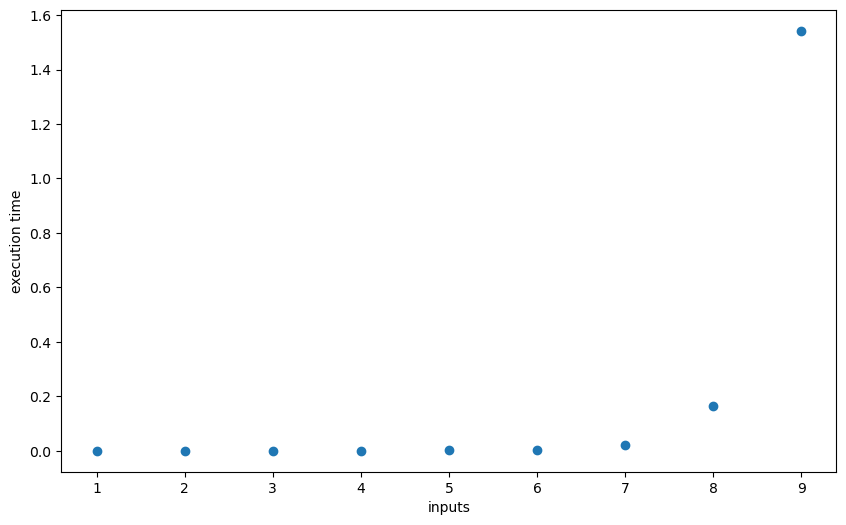

In [47]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(inputs, exec_time)
ax.set_xlabel('inputs')
ax.set_ylabel('execution time')
plt.show()

As seen from the plot above, even when using python's own package, the big O of the algorithm does not imporve. Which means that the only way to speed up the function is by eliminating the for loop that prints each element of the permutation seperately. Instead, the permutation will be printed in one line.

In [ ]:
def f1_change (sequence,end):
    print(sequence)
    print('\n')
def f2_change(sequence,start,end):
    if start == end:
        f1_change(sequence,end)
    else:
        for i in range(start , end,1):
            temp = sequence[start]
            sequence[start] = sequence[i]

            sequence[i] = temp
            f2_change(sequence,start+1,end)
            temp = sequence[start]
            sequence[start] = sequence[i]
            sequence[i] = temp

In [ ]:
exec_time = []
inputs = []
for i in range(2,11,1):
    range_1 = range(1, i)
    list_1 = list(range_1)
    start = time.time()
    f2_change(list_1,0,i-1)
    end = time.time()
    change = end-start
    exec_time.append(change)
    inputs.append(i-1)
print(exec_time)
print(inputs)

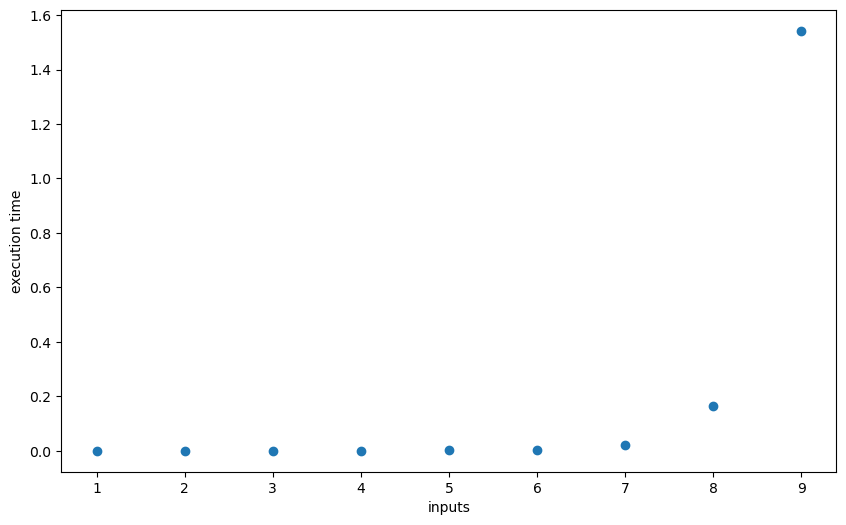

In [48]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(inputs, exec_time)
ax.set_xlabel('inputs')
ax.set_ylabel('execution time')
plt.show()

2. ### [**AQ2**] *Considering the following problem, answer the questions:* 

Alex has a ribbon of <ins>length N</ins>. He wants to cut the ribbon in a way that fulfils the following __three__ conditions:

- Each piece of the cut should have an <ins>integer length</ins> 
- He should <ins>at least</ins> cut the ribbon once
- The __multiplication__ of the length of all the pieces be the <ins>maximum possible</ins> 

1. Implement a __recursive algorithm__ to help Alex find the maximum possible value after multiplying the length of the pieces. Explain your algorithm in detail. 

The algorithm will be fed an integer length, which represents the length of the cloth, and it outputs an integer prod, which represents the maximum value that can be obtained from the product from the integers (x,y,z,...) where x+y+z+...=length. So, what the algorithm below does is that it recursively breaks down the length into smaller integers. For example, if length = 10, it tries 1 and 9 first, then it breaks down the 9 into smaller integers. It keeps doing this recursively with all possibilites and stores the largest values obtained.

In [2]:
def ribbon_cut(length):
    if length <5:
        return length
    else:
        rn = range(1,length,1)
        prod = 0
        for i in rn:
            x = ribbon_cut(i) * ribbon_cut(length - i)
            if x > prod:
                prod = x
        return prod       

2. Show that the algorithm has <ins>exponential</ins> running time. 

In [5]:
exec_time = []
inputs = []
for i in range(2,25):
    start = time.time()
    ribbon_cut(i)
    end = time.time()
    change = end-start
    exec_time.append(change)
    inputs.append(i-1)

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(inputs, exec_time)
ax.set_xlabel('inputs')
ax.set_ylabel('execution time')
plt.title("Ribbon cutting recursion version")
plt.show()

After implementing the function and showing the results, the recursive function has an exponential time complexity as the execution time for the input increases rapidly.

3. Now provide a <ins>polynomial solution</ins>, based on __dynamic programming__, and compute its running-time complexity.

Dynamic programming is a way to optimize recursive code in order to make it more time efficient. The dynamic programming technique used here is called memoization. Memoization is when the output of each input is stored to avoid it being calculated again. As shown in the code below, each result of an input is stored in the list called memo, so it can be retrieved again when the same calculation is needed. As shown in the figure below, the function that uses memoization is extremely efficient as it has a big O(n). Which is extremely efficient and scales really well.

In [ ]:
memo = [0 for i in range(30)]
def ribbon_cut_dyn(length):
    if memo[length]!=0:
        return memo[length]
    else:
        if length <5:
            memo[length] = length
            return length
        else:
            rn = range(1,length,1)
            prod = 0
            for i in rn:
                x = ribbon_cut_dyn(i) * ribbon_cut_dyn(length - i)
                if x > prod:
                    prod = x
            memo[length] = prod
            return prod

In [ ]:
exec_time = []
inputs = []
for i in range(2,25):
    start = time.time()
    ribbon_cut_dyn(i)
    end = time.time()
    change = end-start
    exec_time.append(change)
    inputs.append(i)

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(inputs, exec_time)
ax.set_xlabel('inputs')
ax.set_ylabel('execution time')
plt.title("Ribbon cutting dynamic programming version (memoization)")
plt.show()

4. Evaluate the <ins>running time</ins> of your algorithm for the sizes (Ns) in the __range of [2, 25]__, plot the results, and interpret it (if you have implemented <ins>two algorithms</ins>, please include both in the plot and compare them).

As shown in questions 2 and 3, the recursive version without dynamic programming has an exponential time complexity, while the on using it has a linear one. Obviously, the dynamic programming one is much quicker and scales much better for larger inputs as the time taken to compute earlier recursions is already stored. Hence, the number of computations required is much lower and the output is produced significantly faster.